In [1]:
import neutronpy as npy
import numpy as np

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Enter Insturment Parameters

In [3]:
efixed=14.7

In [4]:
hcol=[40,40,40,40]


In [5]:
ana='PG(002)'
mono='PG(002)'

Enter crystal parameters

In [6]:
sample=npy.Sample(4.5,4.5,9.0,90.,90.,90.,u=[1,0,0],v=[0,0,1])

Generate Instrument

In [7]:
EXP=npy.Instrument(efixed,sample,hcol,ana=ana,mono=mono)

Specify an h,k,l,E point to calculate the resolution

In [8]:
q=np.array([1,0,0,0])

Calculate the resolution at point q

In [9]:
EXP.calc_resolution(q)

Resolution parameters

In [10]:
EXP.RMS

array([[  1.20299584e+04,  -1.10583726e-11,   0.00000000e+00,
          1.10907767e-12],
       [ -1.35349440e-10,   1.91603466e+05,   0.00000000e+00,
         -1.84609946e+04],
       [  0.00000000e+00,   0.00000000e+00,   6.34724633e+02,
          0.00000000e+00],
       [  1.31804500e-11,  -1.84609946e+04,   0.00000000e+00,
          1.78540306e+03]])

In [11]:
EXP.R0

array(1820.510585960122)

Calculate a projection

In [12]:
EXP.calc_projections(q,36)

extract the parameters needed to plot the resolution

In [13]:
R0, RMxx, RMyy, RMxy = EXP.get_resolution_params(q, 'QyW', mode='project')

Generate the resolution elipse for plotting

In [14]:
x,y=np.meshgrid(np.linspace(-0.1,0.1,101),np.linspace(-1,1,101),sparse=True)

In [15]:
p = np.array([0., 0., 1., 0, 0, R0, RMxx, RMyy, RMxy])

In [16]:
z=npy.functions.resolution(p, (x, y))

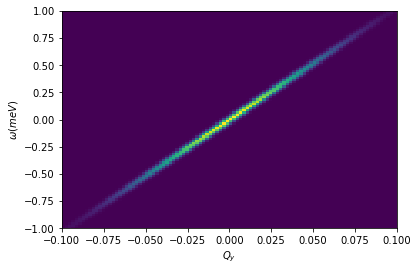

In [17]:
pcolormesh(x,y,z)
xlabel('$Q_y$')
ylabel('$\omega (meV)$')